<a href="https://colab.research.google.com/github/scrameri/Umweltbiologie/blob/master/Tutorial_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial on Data Exploration

### Install packages if needed

In [0]:
need.pckg <- c("GGally","ggplot2","EnvStats") # needed for this script
if (any(!need.pckg %in% installed.packages())) {
  for (i in need.pckg[!need.pckg %in% installed.packages()]) {
    cat("installing", i, "...\n")
    install.packages(i)
  }
}

### Load libraries

In [0]:
library("GGally") # for ggpairs()
library("ggplot2") # for ggplot()
library("EnvStats") # for qqPlot()

### Read the data

In [0]:
morph <- read.csv("https://raw.githubusercontent.com/scrameri/Umweltbiologie/master/Puzzle_ANOVA_LM.csv")

NOTE: the .csv file uses "," rather than ";" as field separators, which can cause troubles when opening the file in Excel on Mac. You can also save a version separated with ";", but you will then need to set `sep=";"`, because the default argument is `read.csv(file, sep = ',')`. Also have a look at the `read.csv2` function.



### Get an overview over the dataset
This dataset contains morphological measurements of eight populations of [*Dianthus carthusianorum*](https://www.infoflora.ch/de/flora/dianthus-carthusianorum.html) taken in Summer 2015 in Wallis (Switzerland). Populations were located in two classes of elevation (4 high, 4 low elevation).

A few facts about [*D. carthusianorum*](https://de.wikipedia.org/wiki/Kart%C3%A4usernelke)
- Karthäuser-Nelke in German, family Caryophyllaceae like *Silene*
- native to Middle Europe, in dry habitats from colline to alpine (introduced to N America) 
- [gynodioecious](https://en.wikipedia.org/wiki/Gynodioecy), meaning that there are female and hermaphroditic individuals
- perennial (or biennial), meaning that plants survive winter as rosettes or seeds
- insect-pollinated
- parasite: fungus [*Microbothryum*](https://fr.wikipedia.org/wiki/Microbotryum) *dianthorum* (anther smut fungus) that causes sterility and is transmitted by pollinators

A few facts about the dataset
- ID: individual ID
- Population: population ID
- Elevation: elevation class
- Date: measurement date
- Infection: whether a plant was [infected](https://upload.wikimedia.org/wikipedia/commons/e/ef/Microbotryum_dianthorum_Dianthus_sp._2019_07_18_05.jpg) or healthy
- Sex: whether a plant was hermaphroditic or female
- Stalk_height: mean stalk height per plant (mm)
- Stalk_count: number of stalks per plant
- Bud_count: number of buds per plant
- Flower_count: number of open flowers per plant
- Flower_diam: flower (corolla) diameter (mm)
- Petal and Sepal lengths and widths (mm)
- Rosette_diam1: diameter of first rosette (mm) - only recorded at high elevation
- Rosette_diam2: diameter of second rosette (mm) - only recorded at high elevation

The experimental design and measurements have been done by [Ursina Walther](https://peg.ethz.ch/people/person-detail.html?persid=158239) (a PhD student in our group). She was interested in studying the evolution of floral traits in this species, especially in relation to the interaction between the plants and their Microbothryum parasite.

Before starting any analysis, always check that the data was read in correctly

In [23]:
str(morph) # lists all variables in the data.frame and their classes

'data.frame':	123 obs. of  17 variables:
 $ ID           : Factor w/ 123 levels "Fald_inf_1","Fald_inf_2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population   : Factor w/ 8 levels "Faldumalp","Gibidumsee",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Elevation    : Factor w/ 2 levels "high","low": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date         : Factor w/ 7 levels "10.7.2015","4.8.2015",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Infection    : Factor w/ 2 levels "healthy","infected": 2 2 2 2 2 2 1 1 1 1 ...
 $ Sex          : Factor w/ 2 levels "female","hermaphroditic": 2 2 2 2 2 2 2 2 2 2 ...
 $ Stalk_height : num  176 112 173 161 165 ...
 $ Stalk_count  : int  2 5 3 3 1 2 7 16 9 3 ...
 $ Bud_count    : int  5 0 4 3 4 4 1 4 4 3 ...
 $ Flower_count : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower_diam  : num  14.1 14 12.8 13.3 14.8 13.2 17 14.6 17.3 11.2 ...
 $ Petal_length : num  5.6 5.3 6.3 4.8 6.5 7.2 8.2 7.7 7.7 4.4 ...
 $ Petal_width  : num  6.6 6.5 5.4 6.4 7.3 7.5 10.1 6 8.6 6.4 ...
 $ Sepal_length : num  12.9 12.6 11.9 13.2 14.

In [24]:
dim(morph) # gives both nrow() and ncol() of the dataset


[1] 123  17

In [25]:
summary(morph$Stalk_height) # gives a summary for one variable

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   28.2   136.4   212.0   256.7   380.0   670.0 

![Question](https://img.icons8.com/flat_round/64/000000/question-mark.png)
 Based on what you now know about the study and the data:
- what are the response variable(s)?
- what are the explanatory variable(s)?

***

### Plot the data
There are various plotting techniques to visualize data. Some people prefer the `R` base graphics, others learn the grammar of graphics implemented in [`ggplot2`](https://ggplot2.tidyverse.org/). For this practical, both approaches might be used. These are the basic functions for the most important plots, shown for `R` base graphics and `ggplot2` graphics:

Use **Scatterplots** to plot two numeric variables (classes `num` for continuous, or `int` for discrete data) against each other. Scatterplots can be more informative if different symbols for an additional factor and sizes for an additional numeric variable are used.

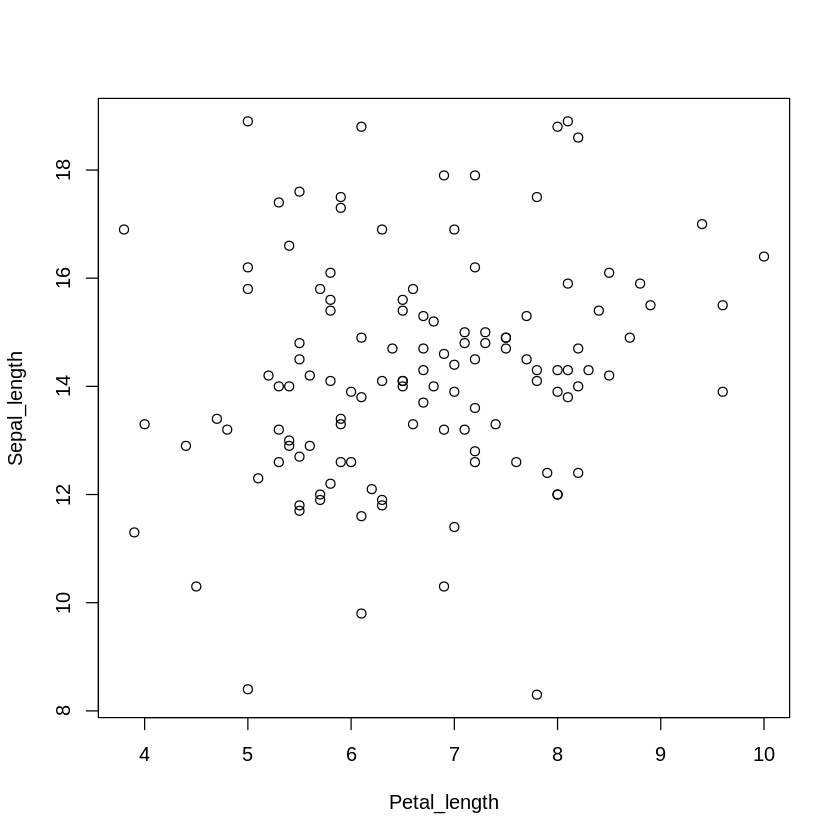

In [30]:
# base
plot(Sepal_length ~ Petal_length, data = morph)

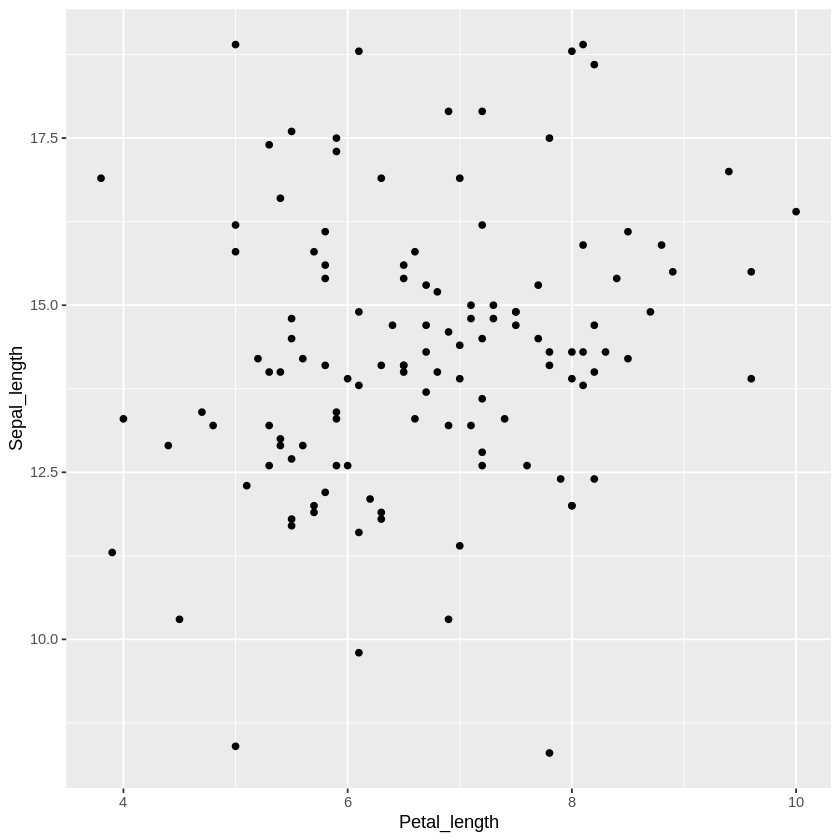

In [31]:
# ggplot2
ggplot(data = morph, aes(x = Petal_length, y = Sepal_length)) + geom_point()

Use **Boxplots** to plot a numeric variable against a categorical variable (class `factor`). Boxplots are summarizing the data. By default, the box is the *interquartile range* and contains 50% of the data points, while the whiskers extend to "the most extreme data point which is no more than 1.5 times the interquartile range from the box". If you have less than eight data points per factor level, you might just aswell plot all the data points using `stripchart(Sepal_length ~ Elevation, data = morph, vertical = TRUE)`.

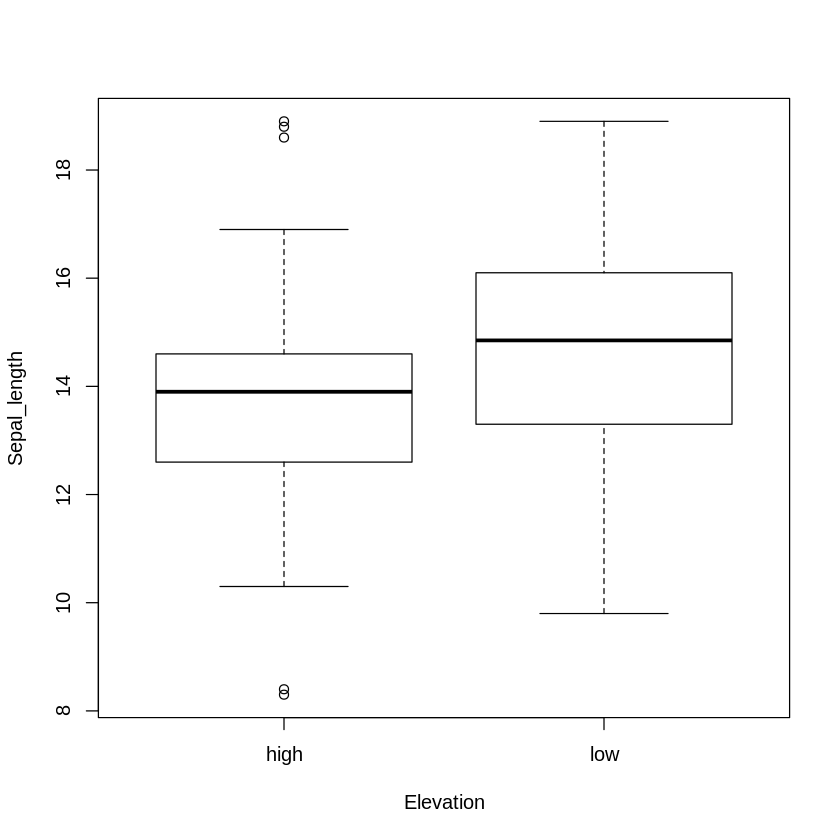

In [32]:
# base
boxplot(Sepal_length ~ Elevation, data = morph)

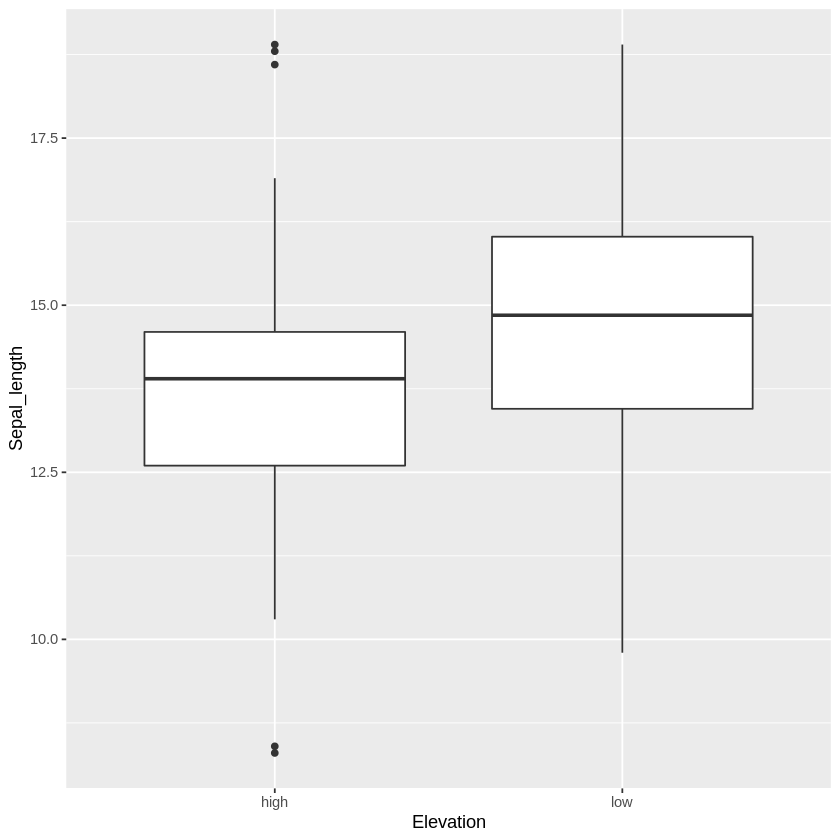

In [33]:
# ggplot2
ggplot(data = morph, aes(x = Elevation, y = Sepal_length)) + geom_boxplot()

Use **Histograms** to plot a variable's distribution. The `breaks` argument can be used to fine-tune the binning of values into histogram categories. Try and play around with it.

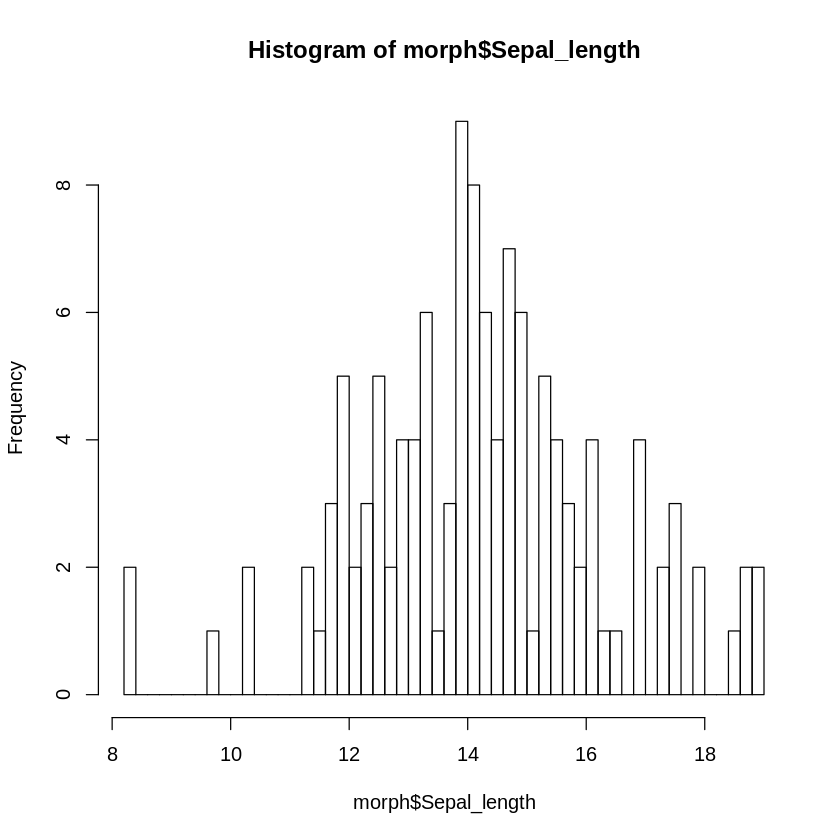

In [37]:
hist(morph$Sepal_length, breaks = 20)

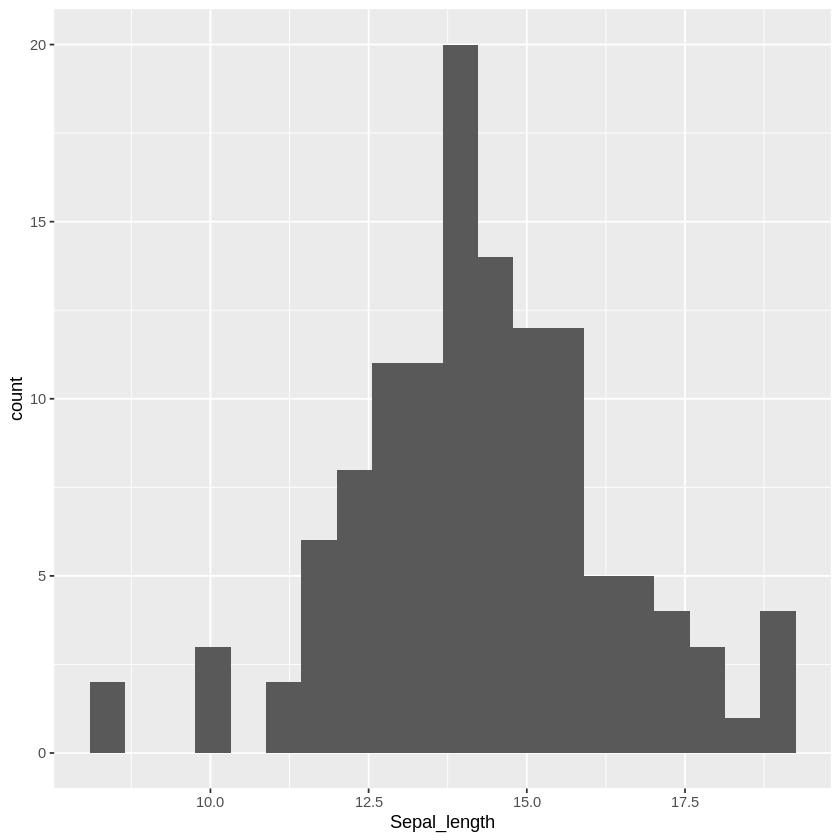

In [41]:
ggplot(data = morph, aes(x = Sepal_length)) + geom_histogram(bins = 20) 

Use **Barplots** to plot all values of a single variable or a table of counts.

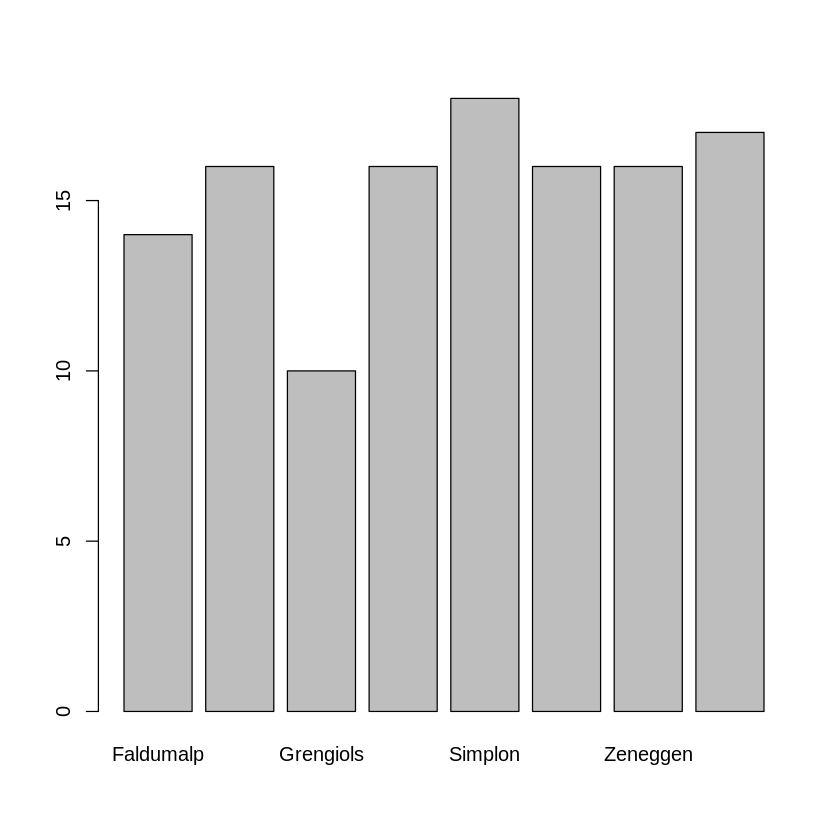

In [34]:
# base
barplot(table(morph$Population))

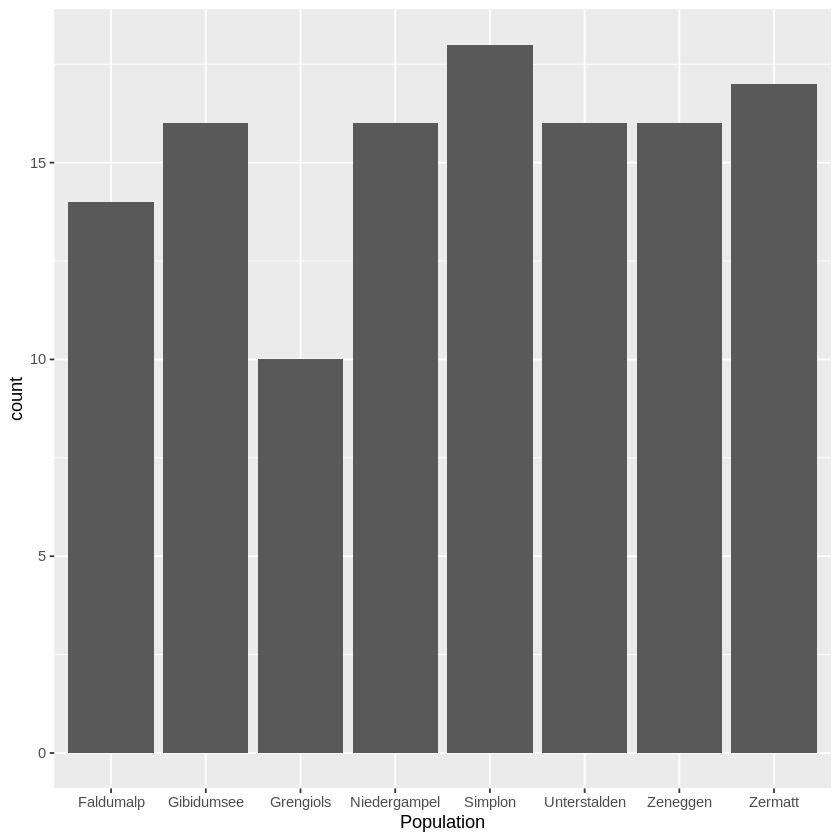

In [35]:
# ggplot2
ggplot(data = morph, aes(x = Population)) + geom_bar(stat = "count")

Use **Mosaic Plots** or **Stacked Barplots** to plot contingency tables of two categorical variables against each other. In a Mosaic Plot, the relative sizes of each mosaic is proportional to the number of observations with a given factor level combination. The stacked barplot is similar, once shown as stacked *counts* and once as stacked *proportions*.

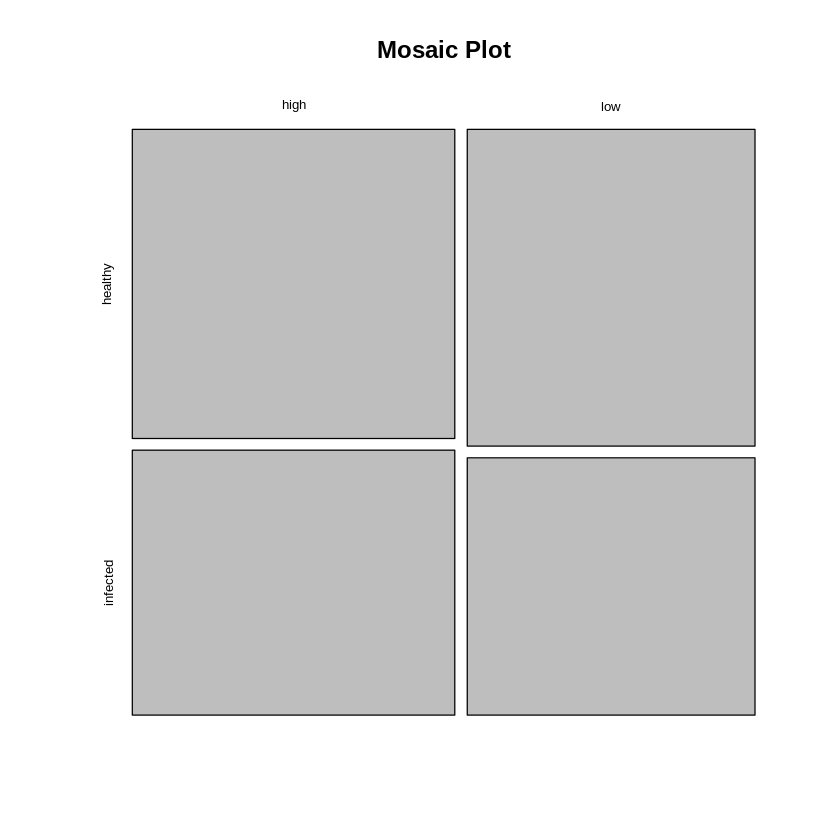

In [44]:
# base
mosaicplot(table(morph$Elevation,morph$Infection), main = "Mosaic Plot")

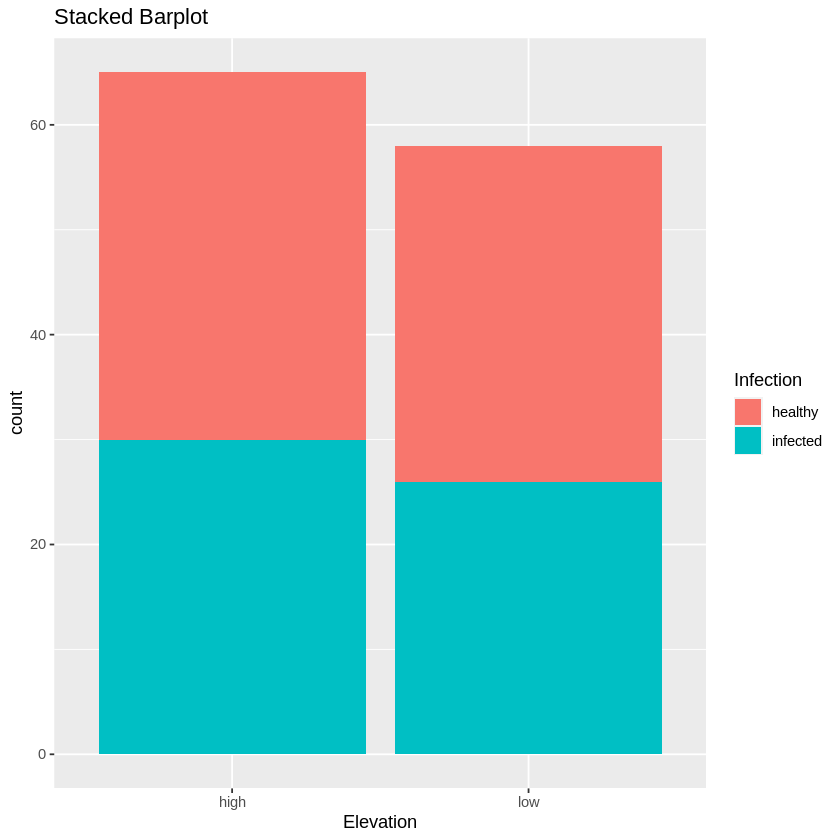

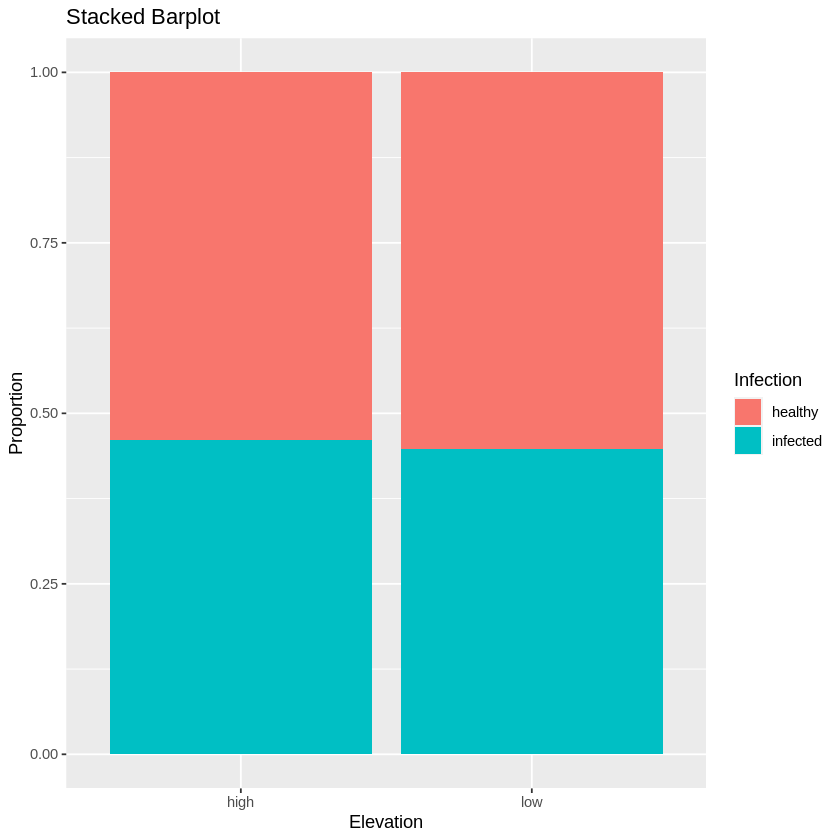

In [58]:
# ggplot2
ggplot(morph, aes(x = Elevation, fill = Infection)) + 
  geom_bar() + 
  ggtitle("Stacked Barplot")
  
ggplot(morph, aes(x = Elevation, fill = Infection)) + 
  geom_bar(position = "fill") + labs(y = "Proportion") +
  ggtitle("Stacked Barplot")

Given that we have 17 variables, plotting all of them against each other would be tedious. For datasets with a moderate number of variables, you can use the `ggpairs` function from the [*GGally*](https://cran.r-project.org/web/packages/GGally/index.html) package to get a graphical overview over many variables at once with a single line of code. The function produces all possible pairwise plots, minimizes redundancy and takes care of factors and numerical variables automatically.

With 17 variables, plotting all against all would lead to too many (289) plots on a single page. Let us therefore subset the variables. You can use `grep` and [**regular expressions**](https://regex101.com/) to find the indices of certain variable names, this often saves code.

In [45]:
# this returns the index of variable names *starting* with 'Flower' (^ specifies the *start*)
grep(pattern = "^Flower_", x = names(morph))

[1] 10 11

In [46]:
# this returns the index of variable names *ending* with 'width' ($ specifies the *end*)
grep(pattern = "width$", x = names(morph)) 


[1] 13 15

In [47]:
# if you put a line in (), the returned value will be printed to the console (saves a print() call)
(vars.fertile <- names(morph)[grep(pattern = "^Flower|^Bud|^Petal|^Sepal", x = names(morph))])
(vars.sterile <- names(morph)[grep(pattern = "^Stalk|^Rosette", x = names(morph))])

[1] "Bud_count"    "Flower_count" "Flower_diam"  "Petal_length" "Petal_width" 
[6] "Sepal_length" "Sepal_width"

[1] "Stalk_height"  "Stalk_count"   "Rosette_diam1" "Rosette_diam2"

The `ggpairs` function prepares the pairwise plots as `gg` class objects. These can then be printed to the plotting device, or saved to a PDF file by enclosing the print commands between the `pdf` and `graphics.off` functions.

It is more reproducible (and therefore more scientific) to save plots with such code rather than by manually exporting a plot from R Studio. The specified `height` and `width` also prevents the saved plot to be smaller or larger depending on your device size.

In [0]:
pairs.fertile <- ggpairs(data = morph, columns = c("Population","Elevation","Infection","Sex", vars.fertile))
pairs.sterile <- ggpairs(data = morph, columns = c("Population","Elevation","Infection","Sex", vars.sterile))

In [0]:
#pdf("Pairsplots.pdf", height = 15, width = 15)
pairs.sterile # or print(pairs.sterile)
#pairs.fertile # or print(pairs.fertile)
#graphics.off()

![Question](https://img.icons8.com/flat_round/64/000000/question-mark.png)
- Can you produce a plot of ```Petal_length ~ Sepal_length``` with points color-coded for ```Infection```?


***

### Check the distribution of your variables
Knowing the distribution of your variables is important, especially if you want to create models of them that make certain assumptions on distributions. You have already seen that the **histogram** is a good visualization of a variable's distribution because deviations from a normal distribution become intuitively apparent.

Let us look at `Stalk_count`, which is a count variable and therefore by definition bound by zero on the left, and unbounded on the right. Such *right-skewed* distributions are not normally distributed.

But which statistical distribution is best at describing your data if not a normal distribution? Knowing this would help you to define an appropriate error distribution in a generalized linear model. Simulations can help you to compare your data against data from a specific statistical distribution. The `R` package [*EnvStats*](https://cran.r-project.org/web/packages/EnvStats/index.html) allows for simulation of different probability distributions and comparison of these against your data in so-called **QQ Plots** (Quantile-Quantile plots).

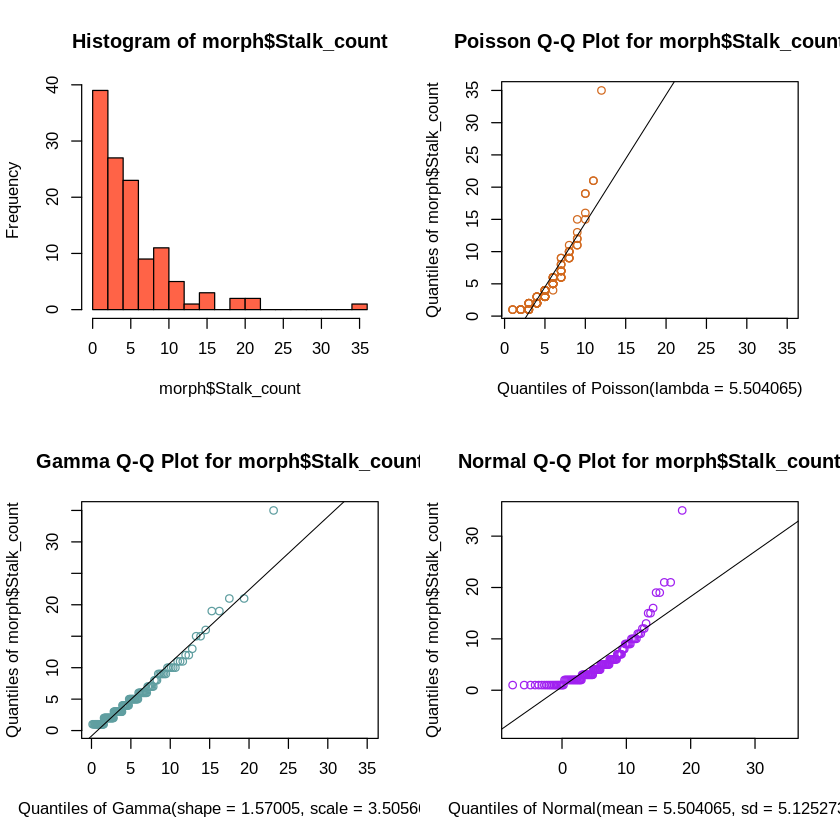

In [55]:
par(mfrow=c(2,2))
hist(morph$Stalk_count, breaks = 20, col = "tomato")
qqPlot(morph$Stalk_count, distribution = "pois", estimate.params = TRUE, add.line = TRUE, points.col = "chocolate")
qqPlot(morph$Stalk_count, distribution = "gamma", estimate.params = TRUE, add.line = TRUE, points.col = "cadetblue")
qqPlot(morph$Stalk_count, distribution = "norm", estimate.params = TRUE, add.line = TRUE, points.col = "purple")
par(mfrow=c(1,1))

![Question](https://img.icons8.com/flat_round/64/000000/question-mark.png)
- Which probability distribution is best at describing ```Stalk_count```? 
- What does this mean for an ANOVA model ```Stalk_count ~ Elevation``` fitted to this data?